# Predicting heart disease using machine learning

This notebook looks into using various Python-based learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease or not

We are going to take following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical params about a patient,can we predict wheter or not they have heart disease?

## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we will pursue project.

## 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

#### Create data dictionary

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
   * Typical angina: chest pain related decrease blood supply to the heart
   * Atypical angina: chest pain not related to heart
   * Non-anginal pain: typically esophageal spasms (non heart related)
   * Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-formal heart beat
    * 2: Possible or definite left ventricular hypertrophy
       * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


In [1]:
# Importing all the tools we need

# we want our place to appear inside the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear in the notebook
%matplotlib inline

# model from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load the data 

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data exploration or EDA

the goal here is to find out more about the data and become a subject matter expert export on the dataset you are woking with

1. what questions are you trying to solve?
2. what kind of data do we have and how do we treat different types?
3. whats missing from the data and how do you deal with it?
4. where are the outliers and why should you care about them?
5. how can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Lets see how many of each class there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

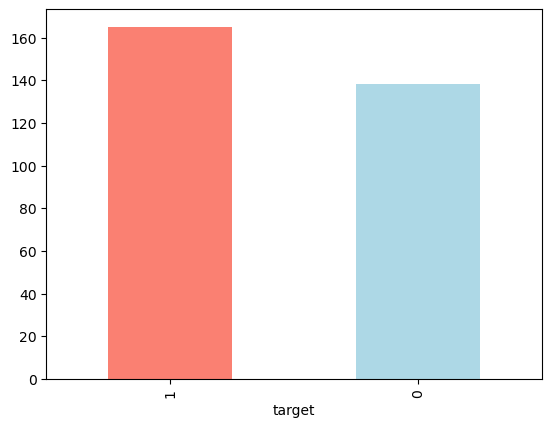

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


###  Heart Disease frequency according to sex

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


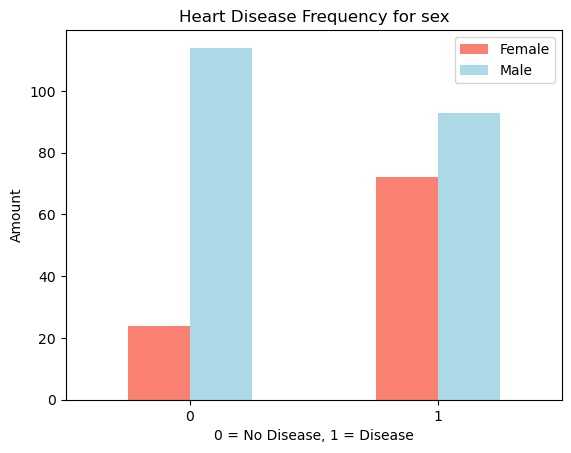

In [12]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

In [13]:
df["thalach"].value_counts

<bound method IndexOpsMixin.value_counts of 0      150
1      187
2      172
3      178
4      163
      ... 
298    123
299    132
300    141
301    115
302    174
Name: thalach, Length: 303, dtype: int64>

## Age vs Max heart rate

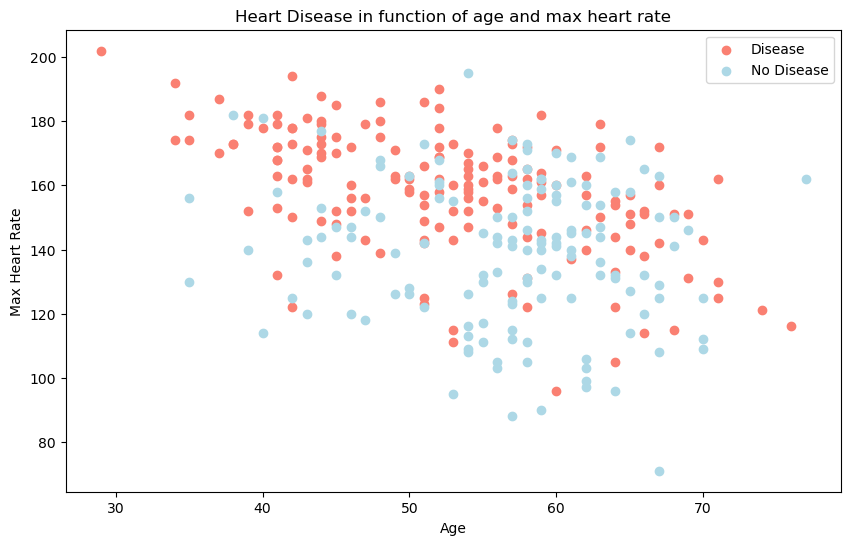

In [14]:
# create another figure
plt.figure(figsize = (10,6))

# scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative numbers 
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");

# Add some helpful info 
plt.title("Heart Disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

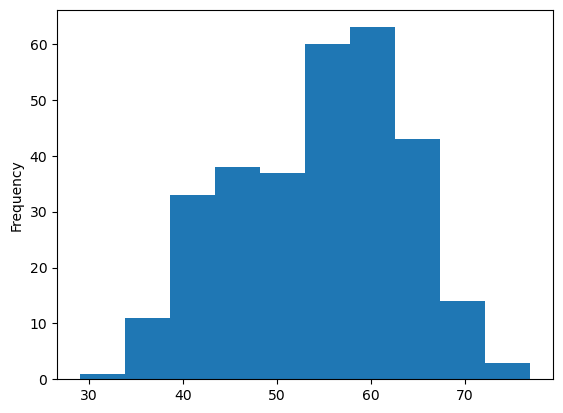

In [15]:
# check the distribution of the age column with a histogram
df.age.plot.hist();

In [16]:
# Make a corelation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


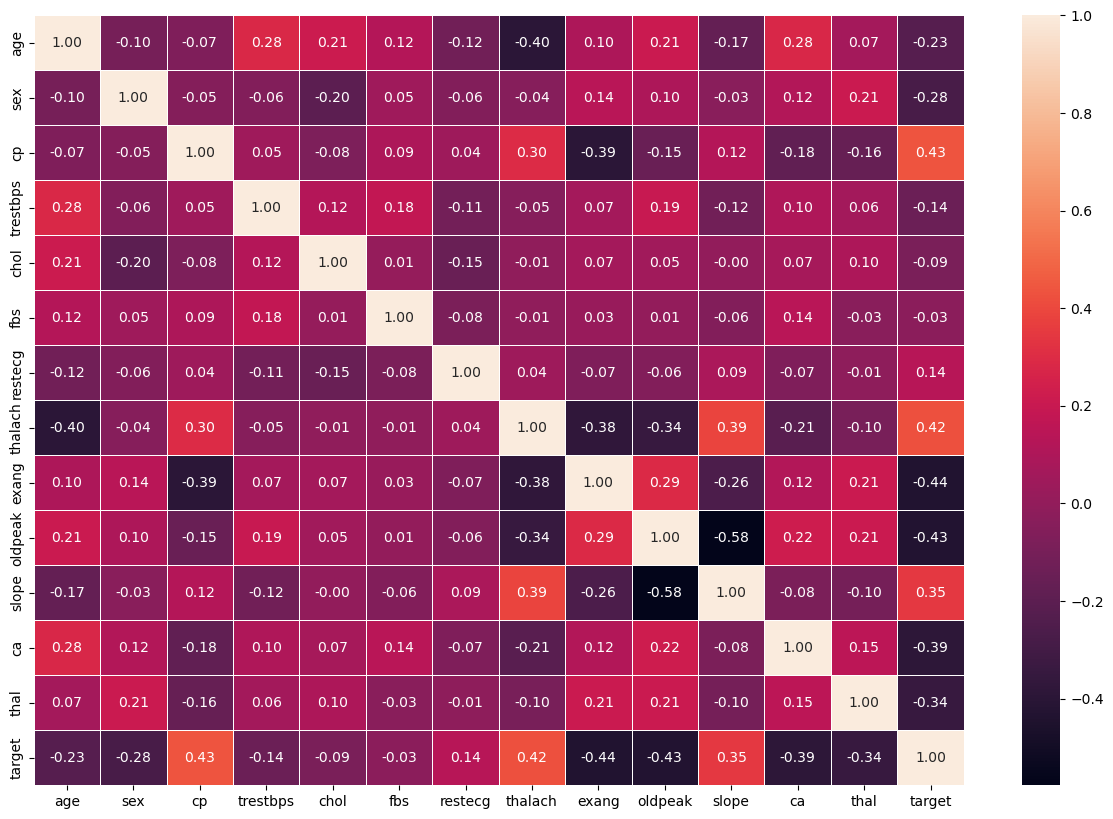

In [17]:
# Lets make out correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = ".2f");

## 5. Modelling

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# Split data into X and y
X =df.drop("target", axis=1)
y = df["target"]

X, y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [20]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [22]:
# Split the data into train and test sets
np.random.seed(69)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [23]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3


In [24]:
y_train

77     1
117    1
124    1
237    0
122    1
      ..
49     1
90     1
107    1
203    0
54     1
Name: target, Length: 242, dtype: int64

Now we have got our data split into training and test sets, its time to build a machine learning model.

we will train it (find the patters) on the training set.

And we will test it (use the patterns) on the test set

We are going to try 3 machine learning models:
1. Logistic Regression
2. K-Nearest neighbours classifier
3. Random forest classifier

In [25]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models,
    models: a dict of different scikit learn machine learning models
    X_train: training data(no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """

    # set random seed
    np.random.seed(69)

    # Make a dict to keep model score
    model_scores = {}

    # loop through models 
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
    

In [26]:
model_score = fit_and_score(models= models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)
model_score

/Users/danishshaikh1423/Desktop/machine_learning/ml_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8688524590163934}

## Model Comparison

<Axes: >

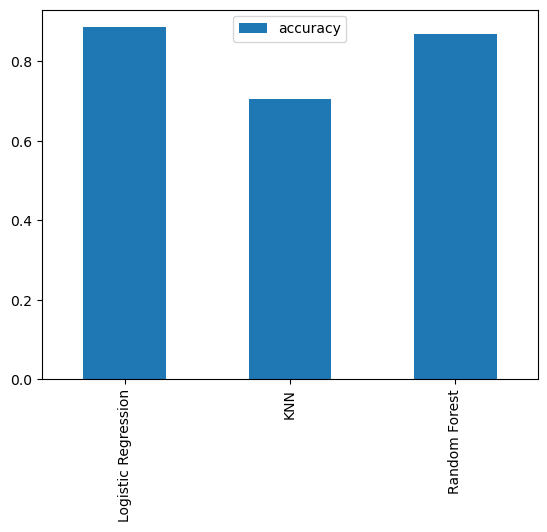

In [27]:
model_compare = pd.DataFrame(model_score, index=["accuracy"])
model_compare.T. plot.bar()

Now we have got a baseline model... and we know a model's first predictions arent always waht we should based our next steps off. what should we do?

lets look at the following:

* Hyperparameter tuning
* feature importance
* confusion-matrix
* cross-validation
* precision
* recall
* f1 score
* classification report
* roc curve
* area under the curve (auc)

## Hperparameter tuning

In [28]:
# lets tune knn

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,100)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [29]:
train_scores

[1.0,
 0.8181818181818182,
 0.78099173553719,
 0.768595041322314,
 0.756198347107438,
 0.768595041322314,
 0.71900826446281,
 0.7272727272727273,
 0.71900826446281,
 0.7231404958677686,
 0.7148760330578512,
 0.7148760330578512,
 0.7066115702479339,
 0.6859504132231405,
 0.6900826446280992,
 0.6735537190082644,
 0.6818181818181818,
 0.6776859504132231,
 0.6818181818181818,
 0.6818181818181818,
 0.6776859504132231,
 0.6776859504132231,
 0.6859504132231405,
 0.6776859504132231,
 0.6818181818181818,
 0.6735537190082644,
 0.6818181818181818,
 0.6859504132231405,
 0.6942148760330579,
 0.6942148760330579,
 0.6818181818181818,
 0.6942148760330579,
 0.6983471074380165,
 0.6859504132231405,
 0.6859504132231405,
 0.6776859504132231,
 0.6776859504132231,
 0.6694214876033058,
 0.6735537190082644,
 0.6735537190082644,
 0.6652892561983471,
 0.6818181818181818,
 0.6735537190082644,
 0.6776859504132231,
 0.6611570247933884,
 0.6652892561983471,
 0.6694214876033058,
 0.6818181818181818,
 0.6611570247933

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.7049180327868853,
 0.6885245901639344,
 0.7049180327868853,
 0.7213114754098361,
 0.6557377049180327,
 0.7049180327868853,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.6721311475409836,
 0.6721311475409836,
 0.6885245901639344,
 0.6557377049180327,
 0.6721311475409836,
 0.639344262295082,
 0.6557377049180327,
 0.6065573770491803,
 0.6229508196721312,
 0.639344262295082,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.6721311475409836,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.6885245901639344,
 0.6557377049180327,
 0.6885245901639344,
 0.6557377049180327,
 0.6885245901639344,
 0.6721311475409836,
 0.688524590163934

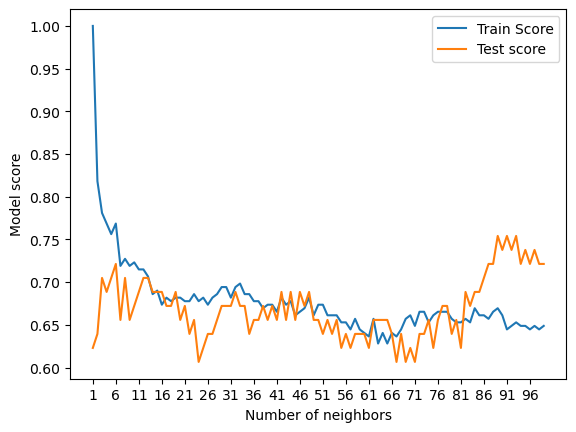

In [31]:
plt.plot(neighbors, train_scores, label = "Train Score")
plt.plot(neighbors, test_scores, label = "Test score")
plt.xticks(np.arange(1,100,5))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend();

In [32]:
print(f"Maximum score on the test data is: {max(test_scores)*100:.2f}%")

Maximum score on the test data is: 75.41%


## Hyperparameter tuning using RandomizedSearhCV

We're going to tune:

* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV()


In [33]:
# Create a hyperparameter grid for logistic regression
lr_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 100, 4),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

Now we have got hyperparameters grid setup for each of our models, lets fine tune them using the randomized search cv...

In [34]:
# Tune LogisticRegression

np.random.seed(69)

# Setup random hyperparamter search for lr
rs_lr = RandomizedSearchCV(LogisticRegression(),
                           param_distributions = lr_grid,
                           cv = 9,
                           n_iter = 14,
                           verbose = True)

# Fit the random hp search model for LR
rs_lr.fit(X_train, y_train)

Fitting 9 folds for each of 14 candidates, totalling 126 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,14
,scoring,None
,n_jobs,None
,refit,True
,cv,9
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [35]:
rs_lr.best_params_

{'solver': 'liblinear', 'C': np.float64(0.08858667904100823)}

In [36]:
rs_lr.score(X_test, y_test)

0.8852459016393442

In [37]:
model_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8688524590163934}

Now we have tuned LogisticRegression(), lets do the same for RandomForestClassifier

In [38]:
np.random.seed(23)

# Setup random hyperparameter search for RandomForestCLassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([10, 14..., 90, 94, 98])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [39]:
rs_rf.best_params_

{'n_estimators': np.int64(66),
 'min_samples_split': np.int64(14),
 'min_samples_leaf': np.int64(3),
 'max_depth': 5}

In [40]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test,y_test)

0.8688524590163934

In [41]:
model_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8688524590163934}

### Hyperparameter using gridseach cv 
since our logistic regression model provides the best scores so far we should try to improve that

In [42]:
# Different hyperparameters for our logisticRegression model
lr_grid = {"C": np.logspace(-4,4,40),
           "solver": ["liblinear"]}

gs_lr = GridSearchCV(LogisticRegression(),
                     param_grid = lr_grid,
                     cv=14,
                     verbose=True)

gs_lr.fit(X_train, y_train)

Fitting 14 folds for each of 40 candidates, totalling 560 fits


,estimator,LogisticRegression()
,param_grid,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,14
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [43]:
gs_lr.best_params_

{'C': np.float64(0.49238826317067363), 'solver': 'liblinear'}

In [44]:
gs_lr.score(X_test, y_test)

0.8852459016393442

In [45]:
model_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8688524590163934}

In [46]:
np.random.seed(23)

gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid = rf_grid,
                     cv = 2,
                     verbose = True)
gs_rf.fit(X_train, y_train)

Fitting 2 folds for each of 8280 candidates, totalling 16560 fits


,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([10, 14..., 90, 94, 98])}"
,scoring,None
,n_jobs,None
,refit,True
,cv,2
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,np.int64(18)


In [47]:
gs_rf.score(X_test, y_test)

0.8524590163934426

In [48]:
model_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8688524590163934}

### Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible. 

To make comparisons and evaluate our trained model, first we need to make the predictions.

In [50]:
# Make predictions with tuned model
y_preds = gs_lr.predict(X_test)
y_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0])

In [51]:
y_test

213    0
243    0
291    0
232    0
15     1
      ..
118    1
133    1
204    0
18     1
279    0
Name: target, Length: 61, dtype: int64

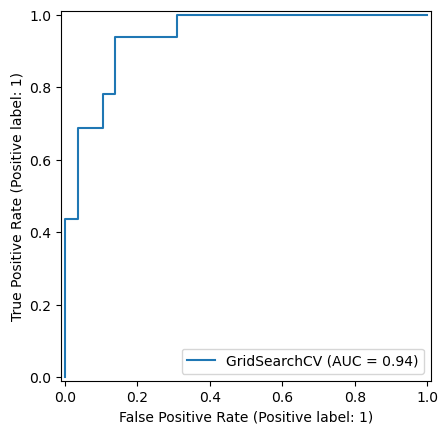

In [54]:
# Plot ROC curve and calculate AUC
RocCurveDisplay.from_estimator(gs_lr, X_test, y_test)
plt.show();

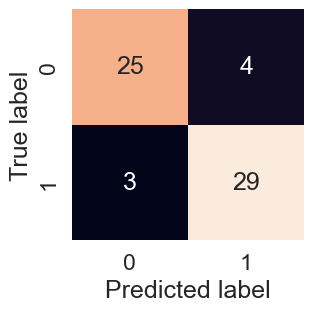

In [56]:
# Confusion matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    '''
    Plots a nice looking confusion matrix
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar = False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

plot_conf_mat(y_test, y_preds)

Now we have got the ROC curve, AUC metric and a confusion matrix, lets get a classification report as well as cross-validated precision, recall and f1-score

In [58]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate metrics using cross valdation

We are going to calculate precision, recall and f1-score of our model using cross-validation and to do so we will be using cros_val_score().

In [59]:
gs_lr.best_params_

{'C': np.float64(0.49238826317067363), 'solver': 'liblinear'}

In [63]:
clf = LogisticRegression(C=0.49238826317067363,
                         solver="liblinear")

cv_acc = cross_val_score(clf, X, y, cv=5, scoring = "accuracy")
cv_acc = np.mean(cv_acc)

cv_precision = cross_val_score(clf, X, y, cv=5, scoring = "precision")
cv_precision = np.mean(cv_precision)

cv_recall = cross_val_score(clf, X, y, cv=5, scoring = "recall")
cv_recall = np.mean(cv_recall)

cv_f1 = cross_val_score(clf, X, y, cv=5, scoring = "f1")
cv_f1 = np.mean(cv_f1)

cv_acc, cv_precision, cv_recall, cv_f1

(np.float64(0.8315300546448088),
 np.float64(0.8139133786192609),
 np.float64(0.9030303030303031),
 np.float64(0.854801884546313))

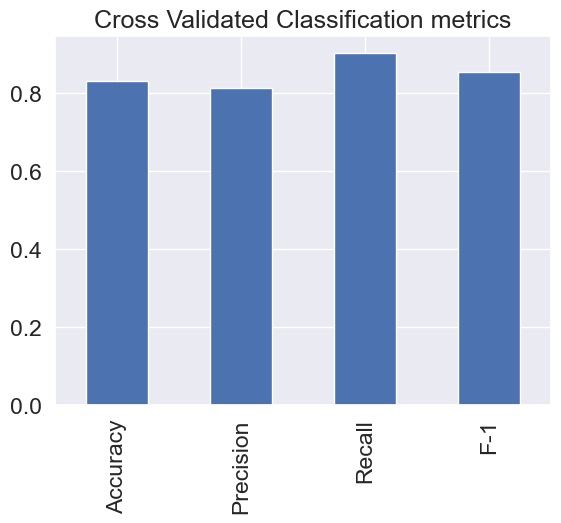

In [64]:
# Visualise cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F-1": cv_f1},
                         index = [0])
cv_metrics.T.plot.bar(title = "Cross Validated Classification metrics",
                      legend = False);

### Feature importance

Feature importance is another as asking, "Which features contributed the most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model.

one way to find feature importance is to search for "(Model name) feature importance"

Lets find the feature importance for our LogisticRegression model...

In [67]:
clf = LogisticRegression(C=0.49238826317067363,
                         solver="liblinear")
clf.fit(X_train, y_train);

In [68]:
clf.coef_

array([[ 0.01094349, -1.19666045,  0.77295185, -0.01710173, -0.00306913,
        -0.00510001,  0.43753533,  0.02940089, -0.60241374, -0.54624595,
         0.41128993, -0.71515274, -0.67385063]])

In [70]:
# Match the coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.010943491826055718),
 'sex': np.float64(-1.1966604508276328),
 'cp': np.float64(0.7729518488523452),
 'trestbps': np.float64(-0.017101730688273534),
 'chol': np.float64(-0.003069130367677649),
 'fbs': np.float64(-0.00510000614470831),
 'restecg': np.float64(0.4375353286001159),
 'thalach': np.float64(0.029400888472800122),
 'exang': np.float64(-0.6024137401144037),
 'oldpeak': np.float64(-0.5462459539408419),
 'slope': np.float64(0.4112899329063239),
 'ca': np.float64(-0.715152738208776),
 'thal': np.float64(-0.6738506302362821)}

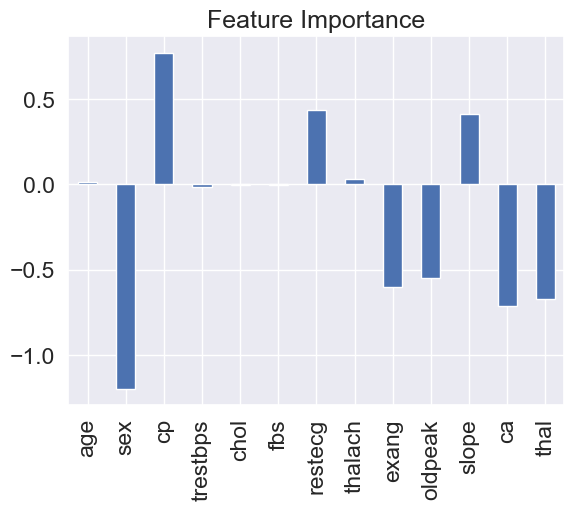

In [72]:
# Visualize the feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

## 6. Experimentation

If you havent hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? beyond what we have done so far)
* if your model is good enough, how would you export it and share it?

